# The Questions

Below are the questions I want to answer in my project:

1. What are the skills most in demand for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What are the optimal skills for data analysts to learn? (High Demand AND High Paying)

# Exploratory Data Analysis

Roles to Explore

In [8]:
# import libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter for US Data Analyst roles

In [2]:
df_DA_US= df[(df['job_country']== 'United States') & (df['job_title_short']== 'Data Analyst')]

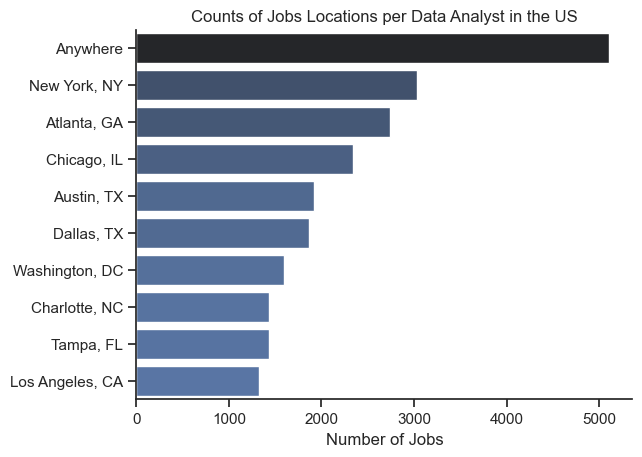

In [14]:
df_plot= df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend= False)
sns.despine() # toglie il lato alto e dx del rettangolo
plt.title('Counts of Jobs Locations per Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

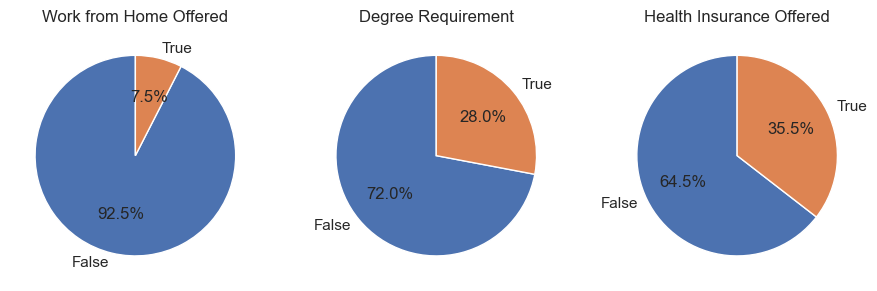

In [16]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

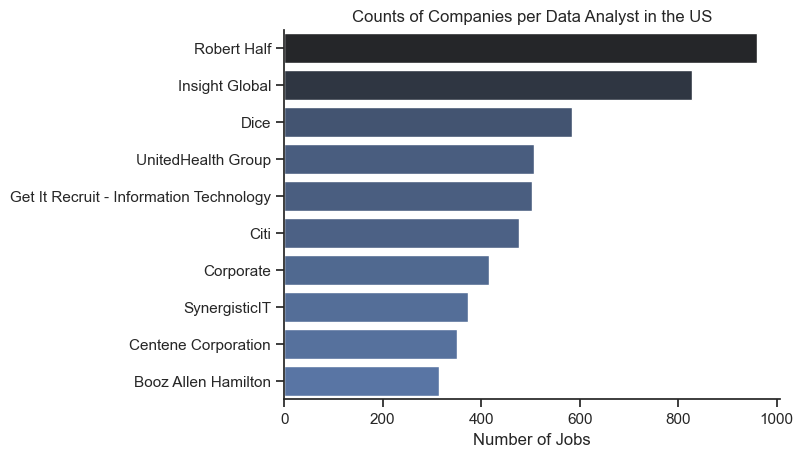

In [17]:
df_plot= df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data= df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend= False)
sns.despine() # toglie il lato alto e dx del rettangolo
plt.title('Counts of Companies per Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()